In [2]:
#!/usr/bin/env python3
## import libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import sys

# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

np.set_printoptions(suppress=True)

# specify
name = 'top5'

model_path = './saved model/500_data/prediction_not_fixed_' + name
model = load_model(model_path)

dataset_path = './datasets/split by random for distributed/prediction/' + name + '_test.csv'
dataset = pd.read_csv(dataset_path, header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)

def calculate_vis_hitting_point(arr):
    __hitting_point = -45
    if (-50 <= float(np.min(arr)) <= -45):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row,1]-arr[row-1,1])
        __vis_hitting_point = (1-w1)*arr[row,:] + w1*arr[row-1,:]
    elif (-45 < float(np.min(arr)) < -40):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row-1,1]-arr[row,1])
        __vis_hitting_point = arr[row,:] - w1*(arr[row-1,:]-arr[row,:])
    return __vis_hitting_point

def modify_input(arr):
    ka = np.array([0])
    for i in range(arr.shape[0]):
        if arr[i,] != 0:
            ka = np.hstack((ka,arr[i,]))
    ka = ka[1:,]
    return ka

hitting_point = -45
__hp = -45
err = np.zeros((1,3))
flag = True

for i in range(dataset.shape[0]):
    tmp = dataset[i,:] ## read trajectory
    ip = modify_input(tmp) ## remove zeros from pandas
    
    ## calculate vis hitting point
    ipp = ip.reshape(int(ip.shape[0]/3),3)
    if (-50 <= float(np.min(ipp)) <= -45):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row,1]-ipp[row-1,1])
        vis_hitting_point = (1-w1)*ipp[row,:] + w1*ipp[row-1,:]
    elif (-45 < float(np.min(ipp)) < -40):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row-1,1]-ipp[row,1])
        vis_hitting_point = ipp[row,:] - w1*(ipp[row-1,:]-ipp[row,:])
    print(vis_hitting_point)
    
    ## padding for model
    ip2 = sequence.pad_sequences(ip.reshape(1,ip.shape[0]), maxlen=ip.shape[0]+27, padding='post', dtype='float32')
    
    for i in range(0,(ip2.shape[1]-27),3):
        t = ip2[:,i:i+27]
        pred = model.predict(t.reshape(1,9,3))
        #print("input = \n", t.reshape(1,9,3))
        #print("output = \n", pred)
        if -55 < pred[0,0,1] < -45 and flag == True:
            #print(t[0,-3:])
            w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
            hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
            print("pred hp a = \n", hp)
            flag = False
            #input()
        if -45 < pred[0,0,1] < -40 and flag == True:
            w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
            hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
            print("pred hp b = \n", hp)
            flag = False
            #input()
    flag = True
    error = vis_hitting_point - hp
    err = np.vstack((err, error))

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

[ 47.54049223 -45.          36.39586845]
pred hp b = 
 [ 47.750935 -45.        36.59963 ]
[ 39.18659043 -45.          28.95489967]
pred hp b = 
 [ 40.972424 -45.        30.27837 ]
[ 79.68480372 -45.          30.40335973]
pred hp b = 
 [ 78.42016  -45.        30.182188]
[ 69.0416008  -45.          37.02567376]
pred hp b = 
 [ 67.286125 -45.        36.537247]
[ 76.80252983 -45.          33.83462188]
pred hp a = 
 [[ 76.017815 -45.        33.81498 ]]
[ 88.70708523 -45.          24.38503253]
pred hp a = 
 [[ 86.83269 -45.       25.58678]]
[ 83.90532782 -45.          31.63590554]
pred hp b = 
 [ 83.088615 -45.        33.600037]
[ 55.82519345 -45.          27.82087288]
pred hp a = 
 [[ 53.572083 -45.        27.254776]]
[ 79.56012211 -45.          40.38488171]
pred hp b = 
 [ 79.29482  -45.        38.748547]
[ 59.71387732 -45.          29.2003868 ]
pred hp b = 
 [ 57.989296 -45.        28.682035]
[ 74.8920836  -45.          31.09339059]
pred hp b = 
 [ 74.34197  -45.        31.654797]
[ 50.95

pred hp a = 
 [[ 49.208153 -45.        29.378778]]
[ 81.81173824 -45.          30.88001799]
pred hp b = 
 [ 80.26628  -45.        29.219328]
[ 75.53327992 -45.          25.2324786 ]
pred hp b = 
 [ 74.92786  -45.        25.806211]
[ 72.81367146 -45.          38.16164503]
pred hp b = 
 [ 72.97296  -45.        37.400303]
[ 63.82812084 -45.          38.90881944]
pred hp b = 
 [ 63.05439  -45.        37.894535]
[ 81.97082564 -45.          23.06049811]
pred hp b = 
 [ 79.11163 -45.       24.67007]
[ 74.82637852 -45.          33.93515824]
pred hp b = 
 [ 72.91335  -45.        33.916397]
[ 91.71664441 -45.          34.92192429]
pred hp b = 
 [ 87.6378  -45.       36.09628]
[ 89.48848988 -45.          34.18165002]
pred hp b = 
 [ 87.51174 -45.       34.89953]
[ 75.73774867 -45.          22.9258339 ]
pred hp a = 
 [[ 74.97056  -45.        25.016249]]
[ 80.96694364 -45.          35.5257356 ]
pred hp b = 
 [ 79.65438 -45.       36.18682]
[ 43.95175701 -45.          34.29819924]
pred hp a = 
 [[ 4

pred hp a = 
 [[ 82.96365 -45.       26.63754]]
[ 55.38901633 -45.          33.5855017 ]
pred hp a = 
 [[ 53.88372 -45.       32.89206]]
[ 58.95049252 -45.          30.48044455]
pred hp b = 
 [ 58.55771  -45.        30.424124]
[ 41.43970197 -45.          33.01780012]
pred hp b = 
 [ 42.07803 -45.       32.71713]
[ 72.16584664 -45.          27.32693859]
pred hp b = 
 [ 71.47644 -45.       27.3921 ]
[ 50.94108187 -45.          34.87415653]
pred hp b = 
 [ 50.00124 -45.       34.48537]
[ 66.20637926 -45.          39.96346515]
pred hp a = 
 [[ 65.666565 -45.        39.52706 ]]
[ 45.35802926 -45.          37.25917184]
pred hp a = 
 [[ 43.908035 -45.        36.35168 ]]
[115.63521988 -45.          34.17961153]
pred hp a = 
 [[112.175674 -45.        36.621494]]
[105.32139695 -45.          34.6060321 ]
pred hp b = 
 [102.10143 -45.       37.11916]
[ 29.2026398  -45.          39.11088396]
pred hp a = 
 [[ 29.155968 -45.        38.625427]]
[ 71.95488252 -45.          22.49421377]
pred hp b = 
 [ 

248
accuray = 99.2%


Text(0.5, 1, 'top5 X Z hitting plane')

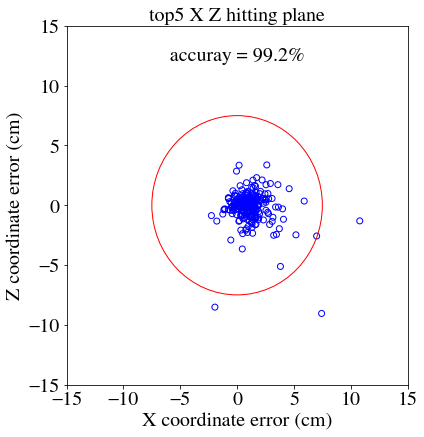

In [3]:
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
text = str("accuray = {}%".format(correct/err2.shape[0]*100))

fig_path_svg = './pic/XZ_plane/'+name+'_test.svg'
fig_path_png = './pic/XZ_plane/'+name+'_test.png'

plt.figure(figsize=(6,6))
x = y = np.arange(-7.5, 7.5, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 7.5, color='r', fill=False)

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))

plt.scatter(err2[:,0], err2[:,2], facecolors='none', edgecolors='b')
#plt.ylim(-20,20)
plt.xlabel('X coordinate error (cm)', fontsize=20, fontname='FreeSerif')
plt.ylabel('Z coordinate error (cm)', fontsize=20, fontname='FreeSerif')
plt.xticks(fontsize=20, fontname='FreeSerif')
plt.yticks(fontsize=20, fontname='FreeSerif')

plt.text(0,12.5,text, fontsize=20, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout(h_pad=0.5)
plt.title(name + ' X Z hitting plane', fontsize=20, fontname='FreeSerif')

248
accuray = 99.2%


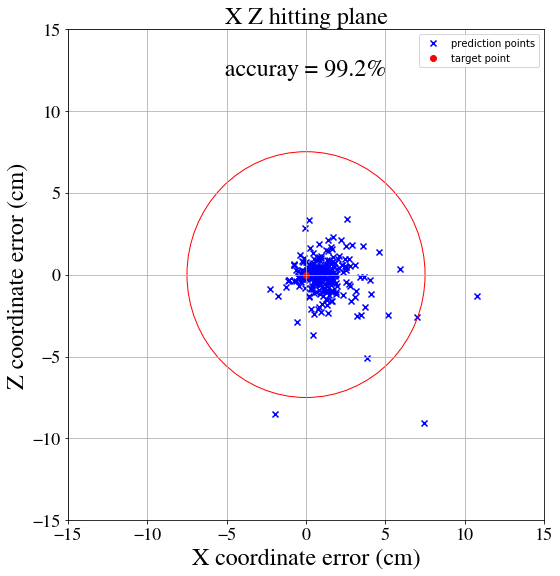

In [61]:
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
text = str("accuray = {}%".format(correct/err2.shape[0]*100))

fig_path_svg = './pic/XZ_plane/'+name+'_test.svg'
fig_path_png = './pic/XZ_plane/'+name+'_test.png'

plt.figure(figsize=(8,8))

x = y = np.arange(-7.5, 7.5, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 7.5, color='r', fill=False, label='paddle edge')

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))


#plt.xlim((-15,15))
#plt.ylim((-15,15))

plt.scatter(err2[:,0], err2[:,2], edgecolors='b', label='prediction points', marker='x', color='b')
plt.scatter(0,0, color='r', marker='o', label='target point')
#plt.scatter(0,0,color='r', marker='o', facecolors='none', s=60000)
plt.Circle((0,0), 7.5, color='r', fill=False)
#plt.scatter(0,0, color='r', marker='o', facecolors='none')
#plt.ylim(-20,20)
plt.xlabel('X coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.ylabel('Z coordinate error (cm)', fontsize=24, fontname='FreeSerif')
plt.xticks(fontsize=18, fontname='FreeSerif')
plt.yticks(fontsize=18, fontname='FreeSerif')
plt.grid(True)
plt.text(0,12.5,text, fontsize=24, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout(pad=1.5)
plt.title('X Z hitting plane', fontsize=24, fontname='FreeSerif')
plt.legend()

#plt.savefig('./pic/XZ_plane/aaa.png')